In [1]:
import warnings
warnings.filterwarnings("ignore")
import bo_wrangle as w
import wrangle as wra

import pandas as pd
import numpy as np

#splits
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression


# Acquire

In [2]:
merged_data = w.left_join_csv('austin_animal_outcomes.csv', 'austin_animal_intakes.csv', 'merged_data.csv')

In [3]:
df = merged_data
df.head(25)

,Animal ID,Name_x,DateTime_x,MonthYear_x,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_x,Sex upon Outcome,Age upon Outcome,...,DateTime_y,MonthYear_y,Found Location,Intake Type,Intake Condition,Animal Type_y,Sex upon Intake,Age upon Intake,Breed_y,Color_y
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,...,05/02/2019 04:51:00 PM,May 2019,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,...,07/12/2018 12:46:00 PM,July 2018,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,...,08/16/2020 10:10:00 AM,August 2020,Armadillo Rd And Clubway Ln in Austin (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,...,02/08/2016 11:05:00 AM,February 2016,Dove Dr And E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,...,02/15/2016 10:37:00 AM,February 2016,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
5,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,...,03/18/2014 07:11:00 AM,March 2014,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
6,A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,...,06/13/2018 12:55:00 PM,June 2018,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,5 years,Chihuahua Shorthair Mix,Brown
7,A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,...,10/05/2020 11:20:00 AM,October 2020,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown
8,A814515,Quentin,05/06/2020 07:59:00 AM,May 2020,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,...,03/01/2020 02:19:00 PM,March 2020,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
9,A860161,*Lalo,07/19/2022 03:53:00 PM,Jul 2022,05/04/2022,Adoption,NaN,Cat,Neutered Male,2 months,...,06/23/2022 03:09:00 PM,June 2022,10008 Parkfield in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair,Brown Tabby


In [4]:
df = merged_data
df.shape

(197204, 23)

# Prepare

In [5]:
df = wra.get_prep_aa(df)

In [6]:
df.head(5)

,name,outcome,dob,intake_type,intake_datetime,outcome_datetime,intake_condition,intake_age,outcome_age,species,found_location,intake_sex,breed,color
0,chunk,rto-adopt,2017-05-02,owner surrender,2019-05-02 16:51:00,2019-05-08 18:20:00,normal,24,24,cat,austin (tx),neutered male,domestic shorthair mix,brown tabby/white
1,gizmo,adoption,2017-07-12,stray,2018-07-12 12:46:00,2018-07-18 16:02:00,normal,12,12,dog,7201 levander loop in austin (tx),intact male,chihuahua shorthair mix,white/brown
3,moose,adoption,2015-10-08,stray,2016-02-08 11:05:00,2016-02-13 17:59:00,normal,4,4,dog,dove dr and e stassney in austin (tx),intact male,anatol shepherd/labrador retriever,buff
4,moose,adoption,2015-10-08,owner surrender,2016-02-15 10:37:00,2016-02-13 17:59:00,normal,4,4,dog,austin (tx),neutered male,anatol shepherd/labrador retriever,buff
5,nan,transfer,2014-03-12,stray,2014-03-18 07:11:00,2014-03-18 11:47:00,nursing,0,0,cat,12034 research in austin (tx),intact male,domestic shorthair mix,orange tabby


In [7]:
# Define the conditions for each age category
conditions = [
    (df['outcome_age'] <= 24),
    (df['outcome_age'] >= 25) & (df['outcome_age'] <= 192),
    (df['outcome_age'] >= 193)
]

# Define the corresponding values for each age category
values = ['puppy', 'adult', 'senior']

# Create the 'age_category' column based on the conditions and values
df['age_category'] = pd.np.select(conditions, values, default='unknown')

In [8]:
df.head(25)

,name,outcome,dob,intake_type,intake_datetime,outcome_datetime,intake_condition,intake_age,outcome_age,species,found_location,intake_sex,breed,color,age_category
0,chunk,rto-adopt,2017-05-02,owner surrender,2019-05-02 16:51:00,2019-05-08 18:20:00,normal,24,24,cat,austin (tx),neutered male,domestic shorthair mix,brown tabby/white,puppy
1,gizmo,adoption,2017-07-12,stray,2018-07-12 12:46:00,2018-07-18 16:02:00,normal,12,12,dog,7201 levander loop in austin (tx),intact male,chihuahua shorthair mix,white/brown,puppy
3,moose,adoption,2015-10-08,stray,2016-02-08 11:05:00,2016-02-13 17:59:00,normal,4,4,dog,dove dr and e stassney in austin (tx),intact male,anatol shepherd/labrador retriever,buff,puppy
4,moose,adoption,2015-10-08,owner surrender,2016-02-15 10:37:00,2016-02-13 17:59:00,normal,4,4,dog,austin (tx),neutered male,anatol shepherd/labrador retriever,buff,puppy
5,nan,transfer,2014-03-12,stray,2014-03-18 07:11:00,2014-03-18 11:47:00,nursing,0,0,cat,12034 research in austin (tx),intact male,domestic shorthair mix,orange tabby,puppy
6,princess,adoption,2013-03-24,owner surrender,2018-06-13 12:55:00,2020-10-05 14:37:00,normal,63,91,dog,austin (tx),spayed female,chihuahua shorthair mix,brown,adult
7,princess,adoption,2013-03-24,owner surrender,2020-10-05 11:20:00,2020-10-05 14:37:00,normal,91,91,dog,austin (tx),spayed female,chihuahua shorthair mix,brown,adult
8,quentin,adoption,2018-03-01,owner surrender,2020-03-01 14:19:00,2020-05-06 07:59:00,normal,24,26,dog,austin (tx),neutered male,american foxhound/labrador retriever,white/brown,adult
9,*lalo,adoption,2022-05-04,stray,2022-06-23 15:09:00,2022-07-19 15:53:00,normal,1,2,cat,10008 parkfield in austin (tx),intact male,domestic shorthair,brown tabby,puppy
10,*donatello,adoption,2014-08-01,stray,2014-10-08 16:39:00,2014-10-18 18:52:00,normal,2,2,cat,2300 waterway bnd in austin (tx),intact male,domestic shorthair mix,black,puppy


In [9]:
# Assuming you have a DataFrame called df
df['tenure'] = df['outcome_age'] - df['intake_age']
df.head(50)

,name,outcome,dob,intake_type,intake_datetime,outcome_datetime,intake_condition,intake_age,outcome_age,species,found_location,intake_sex,breed,color,age_category,tenure
0,chunk,rto-adopt,2017-05-02,owner surrender,2019-05-02 16:51:00,2019-05-08 18:20:00,normal,24,24,cat,austin (tx),neutered male,domestic shorthair mix,brown tabby/white,puppy,0
1,gizmo,adoption,2017-07-12,stray,2018-07-12 12:46:00,2018-07-18 16:02:00,normal,12,12,dog,7201 levander loop in austin (tx),intact male,chihuahua shorthair mix,white/brown,puppy,0
3,moose,adoption,2015-10-08,stray,2016-02-08 11:05:00,2016-02-13 17:59:00,normal,4,4,dog,dove dr and e stassney in austin (tx),intact male,anatol shepherd/labrador retriever,buff,puppy,0
4,moose,adoption,2015-10-08,owner surrender,2016-02-15 10:37:00,2016-02-13 17:59:00,normal,4,4,dog,austin (tx),neutered male,anatol shepherd/labrador retriever,buff,puppy,0
5,nan,transfer,2014-03-12,stray,2014-03-18 07:11:00,2014-03-18 11:47:00,nursing,0,0,cat,12034 research in austin (tx),intact male,domestic shorthair mix,orange tabby,puppy,0
6,princess,adoption,2013-03-24,owner surrender,2018-06-13 12:55:00,2020-10-05 14:37:00,normal,63,91,dog,austin (tx),spayed female,chihuahua shorthair mix,brown,adult,28
7,princess,adoption,2013-03-24,owner surrender,2020-10-05 11:20:00,2020-10-05 14:37:00,normal,91,91,dog,austin (tx),spayed female,chihuahua shorthair mix,brown,adult,0
8,quentin,adoption,2018-03-01,owner surrender,2020-03-01 14:19:00,2020-05-06 07:59:00,normal,24,26,dog,austin (tx),neutered male,american foxhound/labrador retriever,white/brown,adult,2
9,*lalo,adoption,2022-05-04,stray,2022-06-23 15:09:00,2022-07-19 15:53:00,normal,1,2,cat,10008 parkfield in austin (tx),intact male,domestic shorthair,brown tabby,puppy,1
10,*donatello,adoption,2014-08-01,stray,2014-10-08 16:39:00,2014-10-18 18:52:00,normal,2,2,cat,2300 waterway bnd in austin (tx),intact male,domestic shorthair mix,black,puppy,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185610 entries, 0 to 197203
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              185610 non-null  object        
 1   outcome           185610 non-null  object        
 2   dob               185610 non-null  datetime64[ns]
 3   intake_type       185610 non-null  object        
 4   intake_datetime   185610 non-null  datetime64[ns]
 5   outcome_datetime  185610 non-null  datetime64[ns]
 6   intake_condition  185610 non-null  object        
 7   intake_age        185610 non-null  int64         
 8   outcome_age       185610 non-null  int64         
 9   species           185610 non-null  object        
 10  found_location    185610 non-null  object        
 11  intake_sex        185610 non-null  object        
 12  breed             185610 non-null  object        
 13  color             185610 non-null  object        
 14  age_

In [11]:
# Convert negative values to positive in the "tenure" column
df['tenure'] = df['tenure'].abs()

In [12]:
df.tenure.nlargest()

136216    118
196610    118
186390    115
137589    114
161464    114
Name: tenure, dtype: int64

In [13]:
df.tenure.nsmallest()

0    0
1    0
3    0
4    0
5    0
Name: tenure, dtype: int64

In [14]:
# Count the number of zeros in the "tenure" column
num_zeros = (df['tenure'] == 0).sum()

# Display the count of zeros
print("Number of zeros in 'tenure' column:", num_zeros)

Number of zeros in 'tenure' column: 105536


In [15]:
df.shape

(185610, 16)

In [16]:
df.tenure.nunique()

117

In [17]:
# Calculate the difference between 'outcome_datetime' and 'intake_datetime' in days
df['tenure_days'] = (df['outcome_datetime'] - df['intake_datetime']).dt.days
# Make all negative numbers positive
df['tenure_days'] = df['tenure_days'].abs()

In [18]:
df.head()

,name,outcome,dob,intake_type,intake_datetime,outcome_datetime,intake_condition,intake_age,outcome_age,species,found_location,intake_sex,breed,color,age_category,tenure,tenure_days
0,chunk,rto-adopt,2017-05-02,owner surrender,2019-05-02 16:51:00,2019-05-08 18:20:00,normal,24,24,cat,austin (tx),neutered male,domestic shorthair mix,brown tabby/white,puppy,0,6
1,gizmo,adoption,2017-07-12,stray,2018-07-12 12:46:00,2018-07-18 16:02:00,normal,12,12,dog,7201 levander loop in austin (tx),intact male,chihuahua shorthair mix,white/brown,puppy,0,6
3,moose,adoption,2015-10-08,stray,2016-02-08 11:05:00,2016-02-13 17:59:00,normal,4,4,dog,dove dr and e stassney in austin (tx),intact male,anatol shepherd/labrador retriever,buff,puppy,0,5
4,moose,adoption,2015-10-08,owner surrender,2016-02-15 10:37:00,2016-02-13 17:59:00,normal,4,4,dog,austin (tx),neutered male,anatol shepherd/labrador retriever,buff,puppy,0,2
5,nan,transfer,2014-03-12,stray,2014-03-18 07:11:00,2014-03-18 11:47:00,nursing,0,0,cat,12034 research in austin (tx),intact male,domestic shorthair mix,orange tabby,puppy,0,0


# Create a histogram plot
plt.hist(df['tenure_days'], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel('Tenure_Days')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185610 entries, 0 to 197203
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              185610 non-null  object        
 1   outcome           185610 non-null  object        
 2   dob               185610 non-null  datetime64[ns]
 3   intake_type       185610 non-null  object        
 4   intake_datetime   185610 non-null  datetime64[ns]
 5   outcome_datetime  185610 non-null  datetime64[ns]
 6   intake_condition  185610 non-null  object        
 7   intake_age        185610 non-null  int64         
 8   outcome_age       185610 non-null  int64         
 9   species           185610 non-null  object        
 10  found_location    185610 non-null  object        
 11  intake_sex        185610 non-null  object        
 12  breed             185610 non-null  object        
 13  color             185610 non-null  object        
 14  age_

# Bin the 'tenure_days' column
df['tenure_bin'] = pd.cut(df['tenure_days'], bins=[0, 14, df['tenure_days'].max()], labels=['bin 1', 'bin 2'])

# Create a histogram plot
plt.hist(df['tenure_bin'], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel('Tenure_Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

# Define the bin edges
bin_edges = [0, 14, float('inf')]

# Bin the 'tenure_days' column
df['tenure_bin'] = pd.cut(df['tenure_days'], bins=bin_edges, labels=['bin 1', 'bin 2'])

# Create a histogram plot
plt.hist(df['tenure_bin'], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel('Tenure_Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

# Get the maximum value in the 'tenure_days' column
max_tenure_days = df['tenure_days'].max()

# Define the bin edges
bin_edges = [0, 14, max_tenure_days + 1]

# Bin the 'tenure_days' column
df['tenure_bin'] = pd.cut(df['tenure_days'], bins=bin_edges, labels=['bin 1', 'bin 2'])

# Create a histogram plot
plt.hist(df['tenure_bin'], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel('Tenure_Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

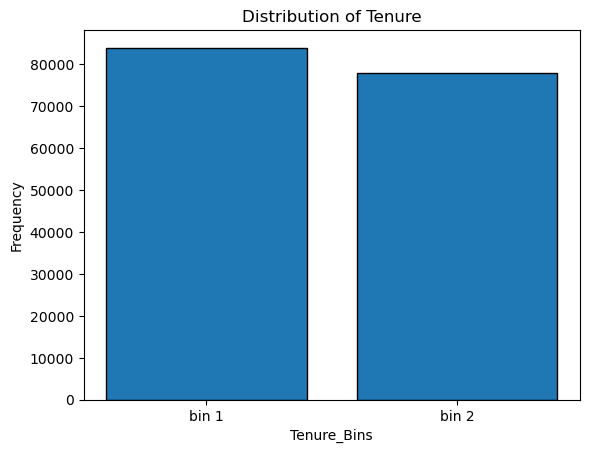

In [22]:
# Bin the 'tenure_days' column
df['tenure_bin'] = pd.cut(df['tenure_days'], bins=[0, 14, df['tenure_days'].max()], labels=['bin 1', 'bin 2'])

# Count the occurrences of each bin category
bin_counts = df['tenure_bin'].value_counts()

# Create a bar plot
plt.bar(bin_counts.index, bin_counts.values, edgecolor='black')

# Add labels and title
plt.xlabel('Tenure_Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

<AxesSubplot:>

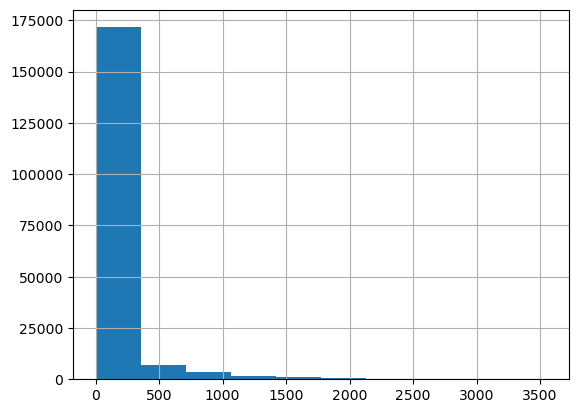

In [29]:
df.tenure_days.hist()

<AxesSubplot:ylabel='Frequency'>

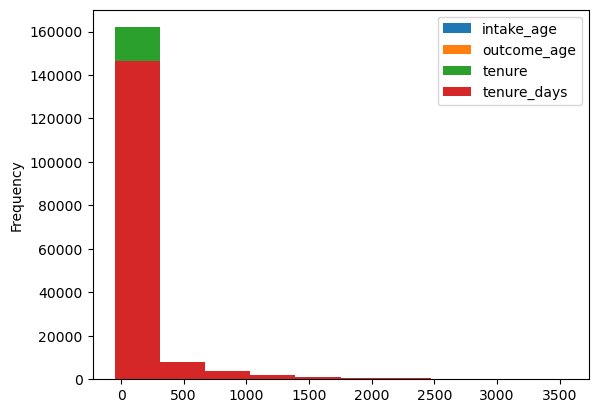

In [30]:
df[df.tenure_days > 0].plot.hist()

# Question and Hypothesis Statement

# Conclusion

# Question and Hypothesis Statement

# Conclusion

# Question and Hypothesis Statement

# Conclusion